importing libraries

In [114]:
import sys, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

importing stock prices for the time period December 2015 to November 2020

In [115]:
#apple_full = pd.read_csv('AAPL.csv')
#amd_full = pd.read_csv('AMD.csv')
intel_full = pd.read_csv('INTC.csv')
#microsoft_full = pd.read_csv('MSFT.csv')
#nvidia_full = pd.read_csv('NVDA.csv')

In [116]:
# data we want to predict
subject_data = intel_full

# number of days we will be predicting
#TIP: 20 = a financial month
guess_period = 20

# number of days we will be training the RNN on
#TIP: 20 = a financial month
#TIP2: the maximum logical value is '(subject_data.shape[0]-guess_period)'
train_period = (subject_data.shape[0]-guess_period)

# gives use the values we will be training on
training_set = subject_data.iloc[
    (subject_data.shape[0]-guess_period)-train_period:
    (subject_data.shape[0]-guess_period),
     1:2].values

real_stock_price= subject_data.iloc[(subject_data.shape[0]-guess_period):, 1:2].values

In [117]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [118]:
n_timesteps = 30

X_train = []
y_train = []

for i in range(n_timesteps, training_set_scaled.shape[0]):
    X_train.append(training_set_scaled[i-n_timesteps:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [119]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

building the RNN

In [120]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout 

In [121]:
regressor = Sequential()

n_neurons = 50

regressor.add(LSTM( units = n_neurons, return_sequences= True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(.2))

regressor.add(LSTM( units = n_neurons, return_sequences= True))
regressor.add(Dropout(.2))

regressor.add(LSTM( units = n_neurons, return_sequences= True))
regressor.add(Dropout(.2))

regressor.add(LSTM( units = n_neurons, return_sequences= True))
regressor.add(Dropout(.2))

regressor.add(LSTM( units = n_neurons, return_sequences= False))
regressor.add(Dropout(.2))

regressor.add(Dense(units=1))

regressor.compile(optimizer= 'adam', loss= 'mean_squared_error')

In [122]:
regressor.fit(X_train, y_train, epochs= 120, batch_size= 32)

Epoch 1/120
38/38 [==============================] - 1s 37ms/step - loss: 0.0388
Epoch 2/120
38/38 [==============================] - 1s 39ms/step - loss: 0.0094
Epoch 3/120
38/38 [==============================] - 1s 36ms/step - loss: 0.0097
Epoch 4/120
38/38 [==============================] - 1s 39ms/step - loss: 0.0084
Epoch 5/120
38/38 [==============================] - 1s 39ms/step - loss: 0.0086
Epoch 6/120
38/38 [==============================] - 1s 39ms/step - loss: 0.0085
Epoch 7/120
38/38 [==============================] - 1s 39ms/step - loss: 0.0075
Epoch 8/120
38/38 [==============================] - 1s 39ms/step - loss: 0.0069
Epoch 9/120
38/38 [==============================] - 1s 38ms/step - loss: 0.0071
Epoch 10/120
38/38 [==============================] - 1s 36ms/step - loss: 0.0068
Epoch 11/120
38/38 [==============================] - 1s 38ms/step - loss: 0.0062
Epoch 12/120
38/38 [==============================] - 1s 37ms/step - loss: 0.0064
Epoch 13/120
38/38 [=====

making preditions

In [123]:
subject_data_total = subject_data['Open']

lower_bound = len(subject_data_total) - len(real_stock_price) - n_timesteps

inputs = subject_data_total[lower_bound:].values

inputs = inputs.reshape(-1,1)

In [124]:
inputs = sc.transform(inputs)

X_test = []
for i in range(n_timesteps, inputs.shape[0]):
    X_test.append(inputs[i-n_timesteps:i, 0])
X_test = np.array(X_test)

X_test = X_test.reshape( X_test.shape[0], X_test.shape[1], 1)

predicted_stock_price = regressor.predict(X_test)

predicted_stock_price = sc.inverse_transform(predicted_stock_price)

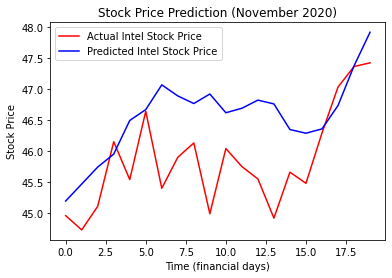

Last prediction: 47.9
Last real price: 47.4


In [125]:
# adding data to the plot
plt.plot(real_stock_price, color = 'red', label = 'Actual Intel Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Intel Stock Price')

plt.title('Stock Price Prediction (November 2020)')
plt.xlabel('Time (financial days)')
plt.ylabel('Stock Price')
plt.legend() # to display legends

plt.show()

last_real_price = real_stock_price[-1][0]
last_predicted_price = predicted_stock_price[-1][0]

print (f"Last prediction: {last_predicted_price:4.1f}\nLast real price: {last_real_price:4.1f}")
# The Actual stock price is the period that belond to the test set which values were exculded from the training.

# The predicted stock price is the attempt at guessing the stock price of the following day based on the results from previous prices.